# <center>R2.08 - Outils numériques pour les statistiques descriptives <br>TP3 - "Just One More" Paradox<center>


_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_

### Imports

In [1]:
# importation des packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Présentation du "Just One More" Paradox

Jouons à un jeu :
- Vous commencez avec 100€, et jouez à Pile ou Face plusieurs fois d'affilés. 
- À chaque fois que vous obtenez un Pile, vous gagnez $80\%$ de votre cagnotte.
- À chaque fois que vous obtenez Face vous perdez $50\%$ de votre cagnotte.

Une pièce (équilibré) ayant autant de chance d'obtenir Pile ou Face, votre gain moyen est :
$$\text{Gain Moyen}=\left(\frac{1}{2}\times 0,8 - \frac{1}{2} \times 0.5 \right) \text{Cagnotte}=0.15 \times \text{Cagnotte} > 0 !!!$$ 

En moyenne on a donc l'impression que l'on gagne de l'argent ! Joueriez-vous à ce jeu ?

--------------------

Nous allons voir dans ce TP qu'à priori, ce jeu n'est en fait pas avantageux pour le joueur, c'est pour cela que l'on parle de **paradoxe**. 

Ce TP est inspiré de la vidéo Youtube suivante.
- https://youtu.be/_FuuYSM7yOo?si=HBCPLJnIFsoM4prG 

--------------------

L'objectif de ce TP est de générer des lancers de pièces pour simuler une population d'individus jouant à ce jeu, dans le but d'étudier le gain moyen et médian en pratique.




### 2.a - Génération pseudo-aléatoire des données

Pour générer des nombre pseudo-aléatoire nous allons utiliser numpy, plus précisément la méthode `np.random.randint` quand il s'agit d'entiers.

Commençons par générer des lancés de dés, et regroupons ces informations dans un tableau.

>__Question 3 :__ Générer une liste `lances_des` contenant **1000**  entiers aléatoires entre $1$ et $6$. Puis grâce à la commande `pd.DataFrame`, créer un tableau `Lances` contenant ces lancés.

In [2]:
# Création d'un DataFrame avec une colonne contenant les résultats d'un lancé de dés

####TODO####

lances_des = np.random.randint(low=1, high=7, size=1000)
Lances = pd.DataFrame({'Lances_de_des' : lances_des})

>__Question 4 :__  Ajouter deux colonnes supplémentaires au Dataframe `Lances`:
>- `Somme_de_deux_des` contenant la somme de deux lancés de dés.
>- `Somme_de_trois_des` contenant la somme de trois lancés de dés.

In [3]:
# Ajout de colonnes pour la somme de deux lancés et la somme de trois lancés

####TODO####

# Affichage du DataFrame
somme_de_deux = [ np.random.randint(low=1, high=6) + np.random.randint(low=1, high=6) for i in range(1000) ]
somme_de_trois = [ np.random.randint(low=1, high=6) + np.random.randint(low=1, high=6) + np.random.randint(low=1, high=6) for i in range(1000) ]
Lances['Somme_de_deux_des'] = somme_de_deux
Lances['Somme_de_trois_des'] = somme_de_trois
print(Lances.head())

   Lances_de_des  Somme_de_deux_des  Somme_de_trois_des
0              5                  4                   5
1              6                  7                   8
2              1                  8                   7
3              4                  3                  11
4              2                  6                  13


>__Question 5 :__ En vous inspirant du TP1, tracer des diagrammes en barre représentant la distribution des valeurs prisent par 1000 lancés de 1 dés, sommes de 2 dés et sommes de 3 dés.

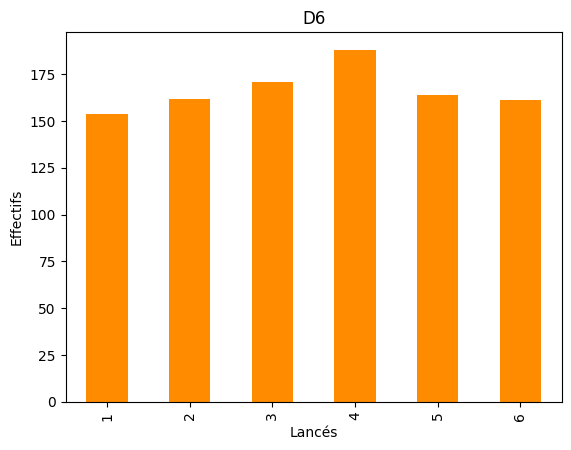

In [4]:
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"

####TODO####
Lances.Lances_de_des.value_counts().sort_index().plot(kind="bar", color='darkorange')
# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Lancés')
plt.ylabel('Effectifs')
plt.title('D6')

# Affichez le graphique
plt.show()

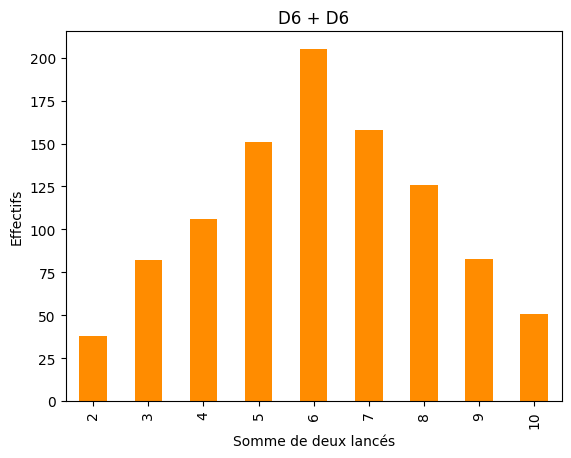

In [5]:
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"

####TODO####
Lances.Somme_de_deux_des.value_counts().sort_index().plot(kind="bar", color='darkorange')
# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Somme de deux lancés')
plt.ylabel('Effectifs')
plt.title('D6 + D6')

# Affichez le graphique
plt.show()

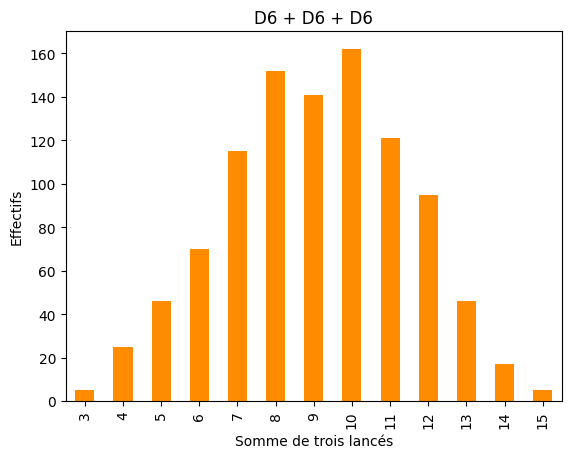

In [6]:

####TODO####
Lances.Somme_de_trois_des.value_counts().sort_index().plot(kind="bar", color='darkorange')
# Ajoute des étiquettes et un titre au graphique.
plt.xlabel('Somme de trois lancés')
plt.ylabel('Effectifs')
plt.title('D6 + D6 + D6')

# Affichage du graphique
plt.show()

La distribution des valeurs se rapproche de plus en plus d'une Gaussienne ! Cette distribution très particulière est celle qui apparaît "le plus" dans des événements aléatoire.

### 2.b - Simulation et étude du paradoxe

Nous pouvons à présent simuler des joueurs. Nous modéliserons les lancer de pièces par un nombre aléatoire : $1$ pour Pile et $0$ pour Face.

>__Question 6 :__ Ecrire une fonction `lance_pile_face` prenant en entré le nombre de lancé à réaliser et le nombre d'individu ayant joué, puis qui donne en sorti un tableau contenant pour chaque personne le nombre de fois qu'ils ont obtenu Pile.

In [7]:
import numpy as np

def lance_pile_face(nombre_lances, nombre_individus):
    # Utilisation de numpy pour générer une matrice de lancers aléatoires (0 pour Face, 1 pour Pile)
    nbPile = []
    somme = 0
    ####TODO####
    for i in range(nombre_individus):
        lance = [np.random.randint(low=0, high=2) for i in range(nombre_lances)]
        for i in range(len(lance)):
            somme += lance[i]
        nbPile.append(somme)
        somme = 0
    return nbPile
    # Calcul du nombre de Pile pour chaque individu
    
    ####TODO####


# Exemple d'utilisation avec 50 lancers de Pile ou Face par personne pour 10 individus
resultats = lance_pile_face(50, 10)

print(resultats)

[29, 25, 31, 27, 28, 24, 24, 25, 22, 25]


Si l'on réalise $l$ lancés de pièces et que l'on obtient $p$ Piles, notre argent devient alors : $cagnotte=100\cdot 1.8^{p} \cdot 0.5^{l-p}$

En utilisant cette formule nous pouvons inclure la cagnotte de chaque individu dans notre tableau.

>__Question 7 :__ Ajouter au Dataframe (construit par `lance_pile_face`) une colonne `cagnotte` contenant l'argent en possession d'un joueur après avoir joué. Puis, calculer la moyenne et la médiane des gains des individus.

In [8]:

####TODO####


Lances['Nombre_de_Pile'] = lance_pile_face(1000, 1000)
Lances['cagnotte'] = 100*1.8**Lances['Nombre_de_Pile']*0.5**(1000 - Lances['Nombre_de_Pile'])
# Calcul de la moyenne et de la médiane de la nouvelle colonne
#moyenne_colonne = 
#median_colonne = #TODO#
Lances.head()
#print("Moyenne de la nouvelle colonne :", moyenne_colonne)
#print("Médiane de la nouvelle colonne :", median_colonne)

,Lances_de_des,Somme_de_deux_des,Somme_de_trois_des,Nombre_de_Pile,cagnotte
0,5,4,5,482,1.281769e-31
1,6,7,8,512,6.264476e-15
2,1,8,7,496,7.871268e-24
3,4,3,11,511,1.740132e-15
4,2,6,13,483,4.614368e-31


>__Question 8 :__ La stratégie intitiale à l'air perdante pour le joueur. Essayons une autre stratégie : on mise toujours la même somme de 100€ (et non plus la totalité de notre cagnotte). Calculer le nouveau gain moyen et médian puis commenter.

In [12]:

####TODO####
Lances['cagnotte'] =  (100 * 1.8) * Lances['Nombre_de_Pile'] + (100 * 0.5) * (1000 - Lances['Nombre_de_Pile'])
Lances.head()

,Lances_de_des,Somme_de_deux_des,Somme_de_trois_des,Nombre_de_Pile,cagnotte
0,5,4,5,482,112660.0
1,6,7,8,512,116560.0
2,1,8,7,496,114480.0
3,4,3,11,511,116430.0
4,2,6,13,483,112790.0


>__Question 9 : (Bonus)__ Ecrire une fonction qui prend comme paramètres : 
>- Le type de stratégie
>- Les paramètres de gains et de pertes
>- Le nombre d'individus
>- Le nombre de lancés
>
>Et qui trace sur un même graphique :
>- L'évolution de la cagnotte de chaque individus 
>- Lévolution de la moyenne et de la médiane.
>
>Commenter.

In [10]:
def simulation_cagnotte(strategie, gains, pertes, nombre_individus, nombre_lances):
    
    ####TODO####


SyntaxError: incomplete input (280527173.py, line 3)